#**Hotel Booking Cancellation Prediction System**

# Project Objective

**Project Goal:** To develop and implement a machine learning model that accurately predicts hotel booking cancellations.

**Objectives:**

*   Identify key features that influence hotel booking cancellations.
*   Build and evaluate various classification models to determine the most effective algorithm for predicting cancellations.
*   Provide insights into cancellation patterns to help hotels optimize strategies for reducing cancellations and improving revenue management.
*   Create a system that can be integrated into existing hotel management platforms for real-time prediction and decision-making.

**Expected Outcomes:**

*   A highly accurate predictive model for hotel booking cancellations.
*   Improved understanding of factors driving cancellations.
*   Enhanced ability for hotels to proactively manage bookings and minimize losses.
*   A foundation for further analysis and optimization of hotel operations.

**Target Audience:** Hotel managers, revenue managers, and data analysts seeking to improve booking management and reduce cancellations.

## Data loading and initial exploration


Load the dataset and perform initial exploration to understand the data structure, identify potential issues, and gain insights into the features.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/hotel_bookings.csv')

# Display the first 5 rows
display(df.head())

# Print the concise summary
display(df.info())

# Display descriptive statistics of numerical columns
display(df.describe())

# Display descriptive statistics of categorical columns
display(df.describe(include='object'))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,10/21/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Data cleaning and preprocessing

Handle missing values and prepare the data for modeling. This includes:
* Appropriate imputation strategies for missing data.
* Outlier detection and handling: Identify and address outliers in relevant features, particularly sales-related data, using appropriate methods.


In [2]:
# Identify columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Display columns with missing values and their counts
display("Columns with missing values and their counts:")
display(missing_values)

'Columns with missing values and their counts:'

,0
children,4
country,488
agent,16340
company,112593



Implement appropriate imputation strategies for the identified missing values and handle outliers in the 'adr' column.



In [3]:
# Imputation Strategy:
# - 'children': This is a small number of missing values. Since it represents the number of children, imputing with the mode (most frequent number of children) seems appropriate as it's a count.
# - 'country': Imputing with the mode is a reasonable strategy for a categorical variable representing the most frequent country of origin.
# - 'agent': This column has a significant number of missing values. 'agent' seems to be an ID. Missing values could indicate direct bookings without an agent. Imputing with a placeholder like 0 or a specific string ('No Agent') can distinguish these cases. Let's use 0, assuming it's not a valid agent ID.
# - 'company': This column has a very large number of missing values, likely indicating no company booking. Similar to 'agent', imputing with 0 or a placeholder is suitable. Let's use 0.

# Impute missing values
df['children'].fillna(df['children'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# Verify that missing values have been imputed
display("Missing values after imputation:")
display(df.isnull().sum()[df.isnull().sum() > 0])

# Outlier Handling for 'adr' (Average Daily Rate)
# 'adr' can have outliers, especially high values from luxury suites or low/zero values from special promotions or errors. Let's use the IQR method to identify and cap outliers.

# Calculate Q1, Q3, and IQR
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers: values below the lower bound are set to the lower bound, and values above the upper bound are set to the upper bound.
df['adr'] = df['adr'].clip(lower=lower_bound, upper=upper_bound)

# Verify that outliers have been addressed by checking descriptive statistics
display("Descriptive statistics of 'adr' after outlier handling:")
display(df['adr'].describe())

/tmp/ipython-input-2723560009.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(df['children'].mode()[0], inplace=True)
/tmp/ipython-input-2723560009.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

'Missing values after imputation:'

,0


"Descriptive statistics of 'adr' after outlier handling:"

,adr
count,119390.000000
mean,100.659305
std,44.688946
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,211.065000


## Exploratory data analysis (eda) and visualization




Conduct in-depth EDA to understand the relationships between features and the target variable (cancellation).
Analyze the distribution of the target variable and explore its relationship with several categorical features using count plots.



/tmp/ipython-input-1967041692.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette='viridis')


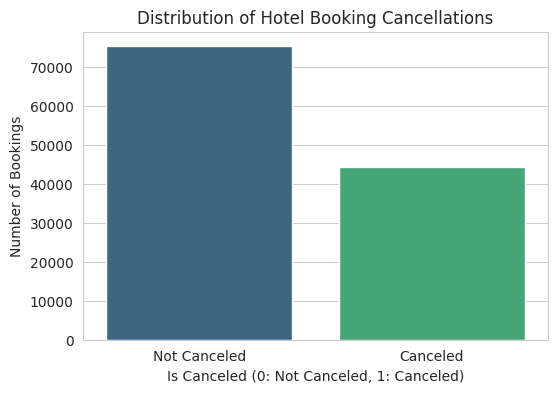

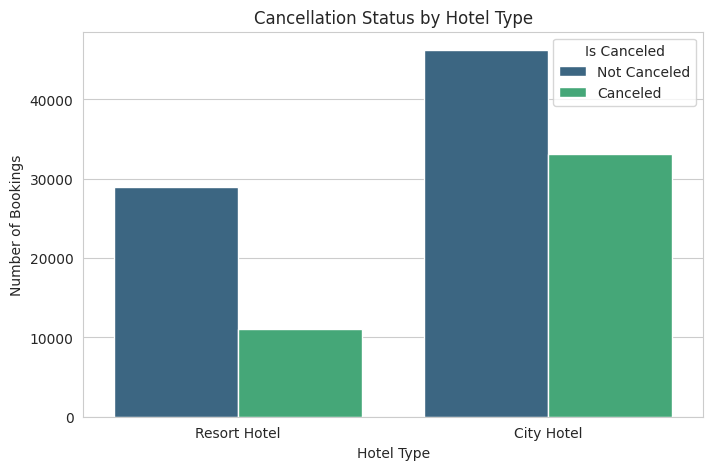

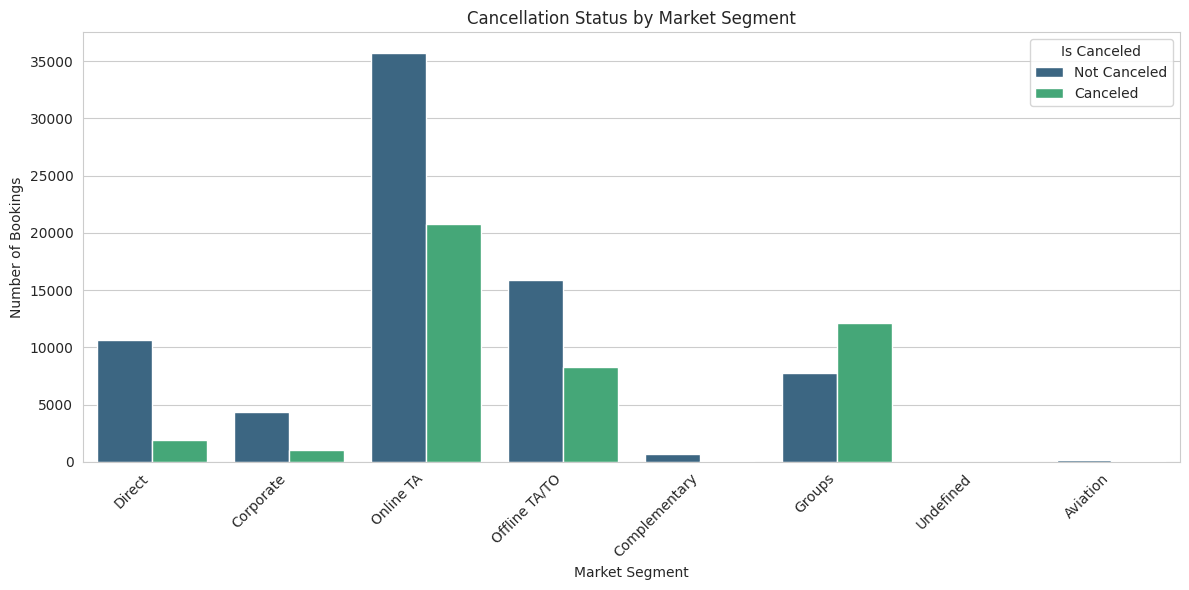

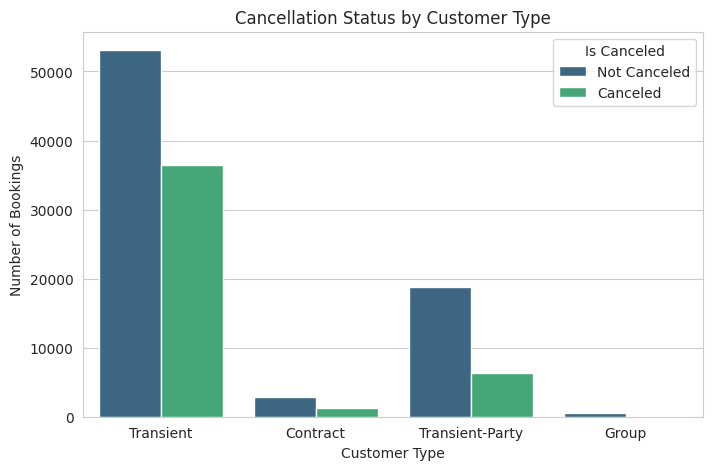

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# 1. Distribution of the target variable ('is_canceled')
plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=df, palette='viridis')
plt.title('Distribution of Hotel Booking Cancellations')
plt.xlabel('Is Canceled (0: Not Canceled, 1: Canceled)')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

# 2. Relationship between 'hotel' type and 'is_canceled'
plt.figure(figsize=(8, 5))
sns.countplot(x='hotel', hue='is_canceled', data=df, palette='viridis')
plt.title('Cancellation Status by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

# 5. Relationship between 'market_segment' and 'is_canceled'
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=df, palette='viridis')
plt.title('Cancellation Status by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

# 6. Relationship between 'customer_type' and 'is_canceled'
plt.figure(figsize=(8, 5))
sns.countplot(x='customer_type', hue='is_canceled', data=df, palette='viridis')
plt.title('Cancellation Status by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()


Explore the relationship between arrival date features, lead time, guest counts, parking spaces, special requests, and ADR with the target variable using appropriate visualizations.



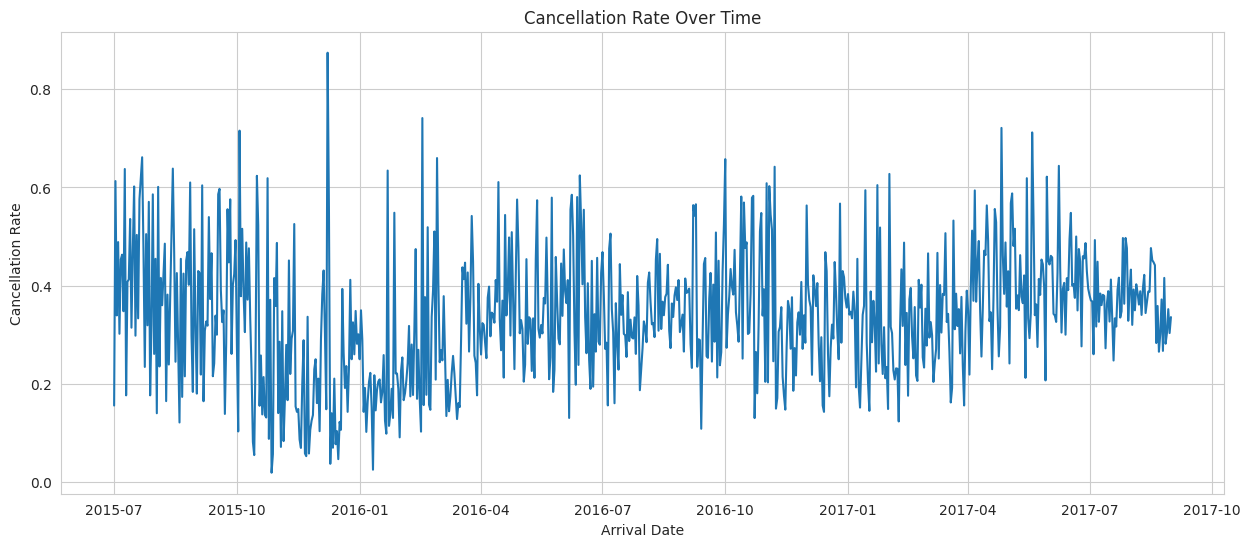

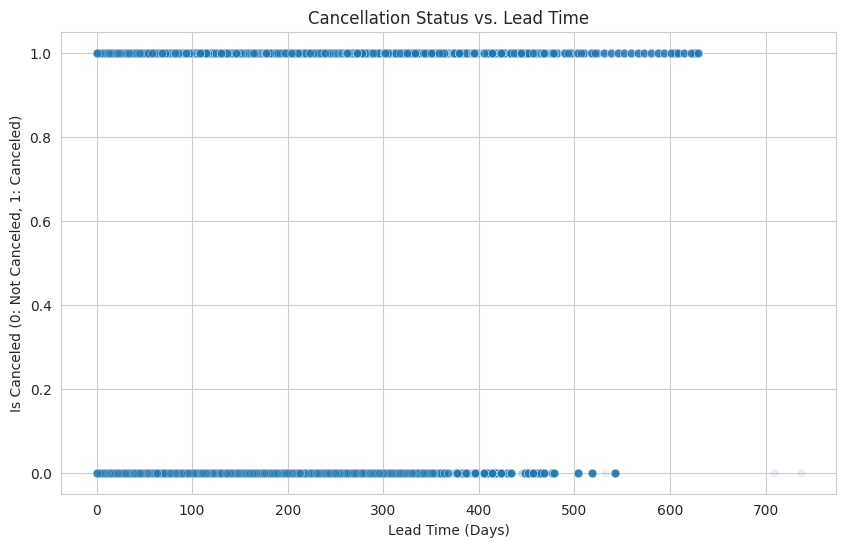

/tmp/ipython-input-2422825805.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate_by_lead_time_bin = df.groupby('lead_time_bin')['is_canceled'].mean().reset_index()
/tmp/ipython-input-2422825805.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lead_time_bin', y='is_canceled', data=cancellation_rate_by_lead_time_bin, palette='viridis')


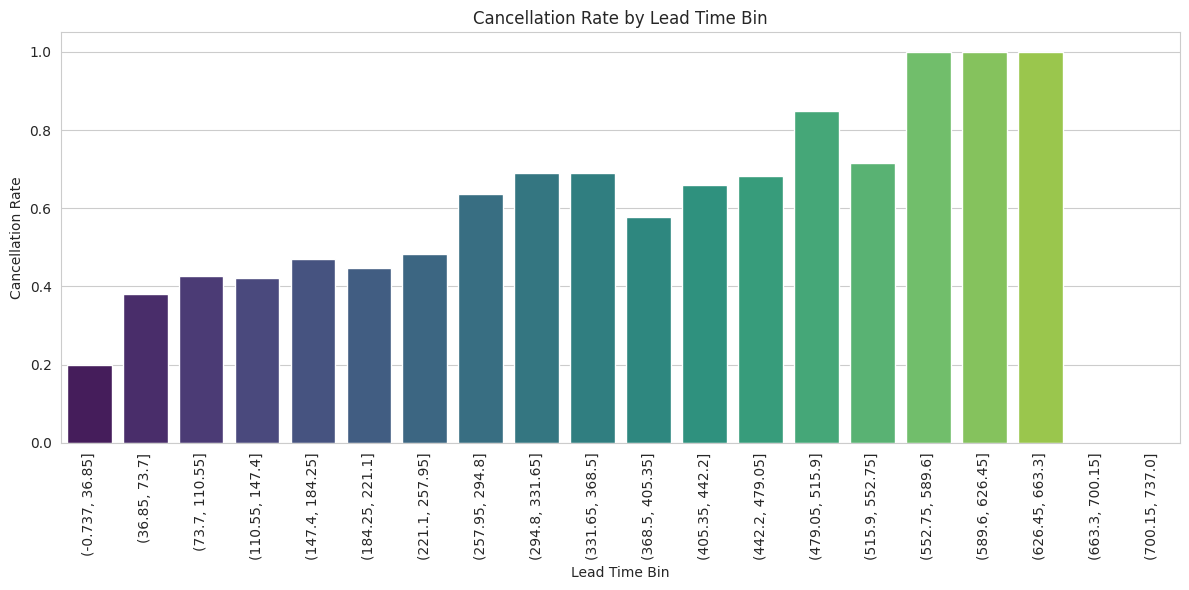

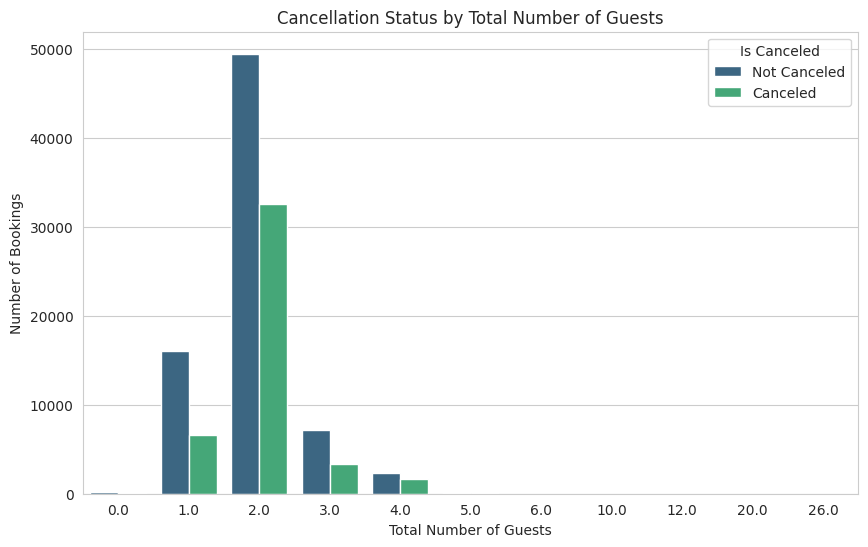

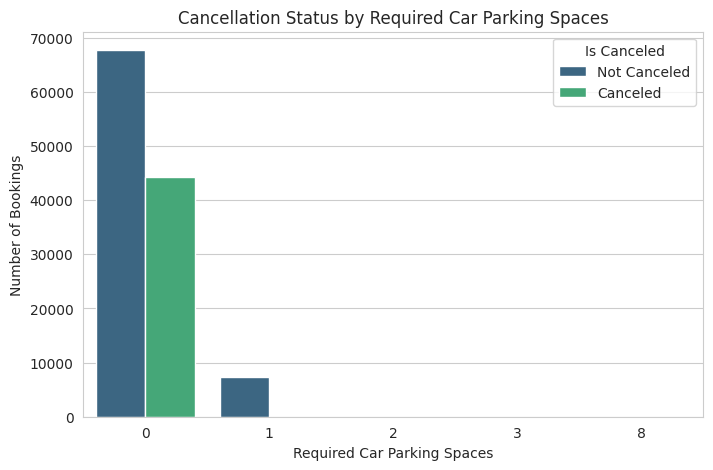

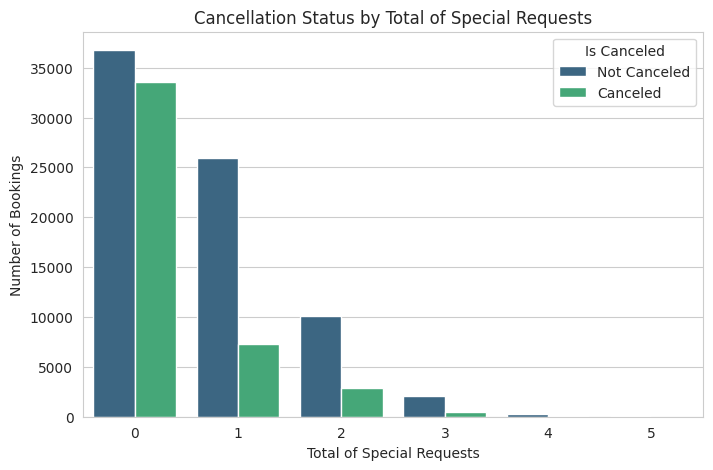

/tmp/ipython-input-2422825805.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='adr', data=df, palette='viridis')


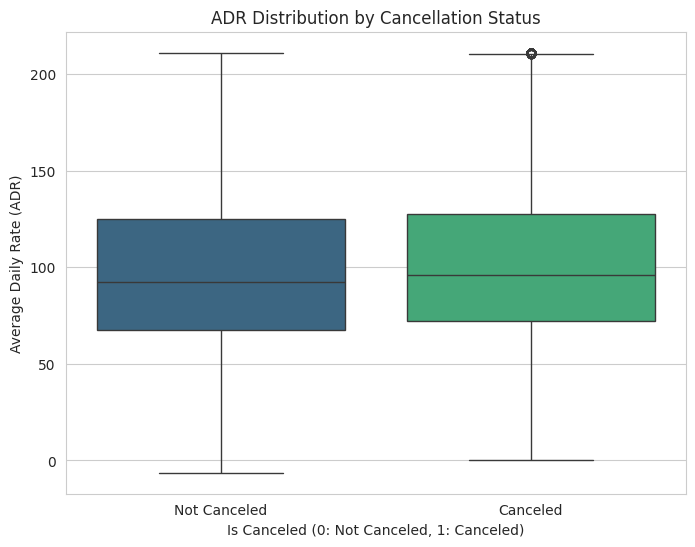

In [5]:
# 3. Relationship between arrival date features and 'is_canceled'
# Combine year, month, and day into a datetime object for easier plotting over time
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))

# Calculate cancellation rate over time
cancellation_rate_over_time = df.groupby('arrival_date')['is_canceled'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='arrival_date', y='is_canceled', data=cancellation_rate_over_time)
plt.title('Cancellation Rate Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Cancellation Rate')
plt.show()

# 4. Impact of 'lead_time' on cancellations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='is_canceled', data=df, alpha=0.1)
plt.title('Cancellation Status vs. Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Is Canceled (0: Not Canceled, 1: Canceled)')
plt.show()

# Binned analysis of lead time
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=20) # Create 20 bins for lead time
cancellation_rate_by_lead_time_bin = df.groupby('lead_time_bin')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='lead_time_bin', y='is_canceled', data=cancellation_rate_by_lead_time_bin, palette='viridis')
plt.title('Cancellation Rate by Lead Time Bin')
plt.xlabel('Lead Time Bin')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 7. Relationship between number of guests and cancellations
df['total_guests'] = df['adults'] + df['children'] + df['babies']

plt.figure(figsize=(10, 6))
sns.countplot(x='total_guests', hue='is_canceled', data=df, palette='viridis')
plt.title('Cancellation Status by Total Number of Guests')
plt.xlabel('Total Number of Guests')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.xlim(-0.5, 10.5) # Limit x-axis for better readability for common guest counts
plt.show()

# 8. Relationship between 'required_car_parking_spaces' and 'is_canceled'
plt.figure(figsize=(8, 5))
sns.countplot(x='required_car_parking_spaces', hue='is_canceled', data=df, palette='viridis')
plt.title('Cancellation Status by Required Car Parking Spaces')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

# 9. Relationship between 'total_of_special_requests' and 'is_canceled'
plt.figure(figsize=(8, 5))
sns.countplot(x='total_of_special_requests', hue='is_canceled', data=df, palette='viridis')
plt.title('Cancellation Status by Total of Special Requests')
plt.xlabel('Total of Special Requests')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

# 10. Relationship between 'adr' (Average Daily Rate) and 'is_canceled'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='adr', data=df, palette='viridis')
plt.title('ADR Distribution by Cancellation Status')
plt.xlabel('Is Canceled (0: Not Canceled, 1: Canceled)')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

## Feature engineering




Create new features, extracting month and day of week from arrival date, calculating total days stayed, creating a weekend booking indicator, creating interaction terms, calculating repeated guest ratio, and indicating popular booking months. Then display the head of the dataframe to show the new features.



In [6]:
# 1. Extract month and day of the week from arrival_date
df['arrival_month'] = df['arrival_date'].dt.month
df['arrival_day_of_week'] = df['arrival_date'].dt.dayofweek # Monday=0, Sunday=6

# 2. Create total number of days stayed
df['total_nights_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# 3. Create a feature indicating weekend booking
# Day of week is 0-6, where 5 is Saturday and 6 is Sunday
df['is_weekend_booking'] = df['arrival_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# 4. Create interaction terms (example: lead_time and market_segment)
# Note: Interaction with the target variable 'is_canceled' directly should be avoided for features used in the final model to prevent data leakage. We'll create interactions between features.
# Let's create an interaction between lead_time and hotel type
df['lead_time_x_hotel_type'] = df['lead_time'] * df['hotel'].apply(lambda x: 1 if x == 'City Hotel' else 0)

# 5. Create a feature for the ratio of repeated guests. Assuming 'is_repeated_guest' is 1 for repeated guests and 0 otherwise.
# The ratio of repeated guests for a booking with multiple guests isn't directly applicable based on the 'is_repeated_guest' flag which is per booking.
# Instead, let's create a simple indicator if the booking includes a repeated guest.
# This feature already exists as 'is_repeated_guest'. Let's skip creating a new ratio feature unless there's a way to identify groups of guests within a single booking and their repeated status.
# Based on the available columns, 'is_repeated_guest' seems to be a booking-level flag. So, we will use the existing 'is_repeated_guest' column as is.

# 6. Explore creating a feature indicating whether the booking was made in a popular booking month.
# Based on previous EDA, let's identify months with high booking volume.
# We can use the top few months by booking count.
month_counts = df['arrival_date_month'].value_counts()
popular_months = month_counts.nlargest(3).index.tolist() # Top 3 months by booking count

df['is_popular_month'] = df['arrival_date_month'].apply(lambda x: 1 if x in popular_months else 0)

# Display the first few rows to inspect the new columns
display(df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status_date,arrival_date,lead_time_bin,total_guests,arrival_month,arrival_day_of_week,total_nights_stay,is_weekend_booking,lead_time_x_hotel_type,is_popular_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,7/1/2015,2015-07-01,"(331.65, 368.5]",2.0,7,2,0,0,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,7/1/2015,2015-07-01,"(700.15, 737.0]",2.0,7,2,0,0,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,7/2/2015,2015-07-01,"(-0.737, 36.85]",1.0,7,2,1,0,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,7/2/2015,2015-07-01,"(-0.737, 36.85]",1.0,7,2,1,0,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,7/3/2015,2015-07-01,"(-0.737, 36.85]",2.0,7,2,2,0,0,1


## Model selection and training






Prepare the data for modeling by selecting features and the target variable, then split the data into training and testing sets.



In [7]:
from sklearn.model_selection import train_test_split

# Identify features (X) and target variable (y)
# Exclude non-numeric or non-predictive columns and the original date components
X = df.drop(['is_canceled', 'arrival_date', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'agent', 'company', 'country', 'hotel', 'arrival_date_week_number', 'reservation_status', 'reservation_status_date', 'assigned_room_type', 'reserved_room_type', 'customer_type', 'distribution_channel', 'market_segment', 'meal', 'is_repeated_guest', 'lead_time_bin'], axis=1) # Dropping columns that are not suitable as features or are duplicates/components of engineered features.
y = df['is_canceled']

# Handle categorical features using one-hot encoding
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (95512, 18)
Shape of X_test: (23878, 18)
Shape of y_train: (95512,)
Shape of y_test: (23878,)



Import the necessary machine learning models and train them on the training data.



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the models
log_reg = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter for convergence
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(n_estimators=50, random_state=42)
grad_boost = GradientBoostingClassifier(n_estimators=50, random_state=42)
# For SVC, using a subset of data or linear kernel due to computational cost on large datasets
# Let's start with a linear kernel and a smaller subset if needed, but try full data first.
# Given the dataset size (around 95k training samples), a linear SVM might be feasible,
# but a non-linear kernel (like rbf) would be computationally expensive.
# Let's use a linear kernel for now.
# Also, scaling the data is generally recommended for SVMs, but let's skip it for this step
# to keep it focused on model instantiation and training as per instructions.
# If SVM training is too slow or performance is poor, we can revisit this.
# For now, let's try with a linear kernel on the full training data.
svc_model = SVC(kernel='linear', random_state=42)
knn_model = KNeighborsClassifier() # Default n_neighbors=5

# Train each model
print("Training Logistic Regression...")
log_reg.fit(X_train, y_train)
print("Logistic Regression training complete.")

print("Training Decision Tree...")
dec_tree.fit(X_train, y_train)
print("Decision Tree training complete.")

print("Training Random Forest...")
rand_forest.fit(X_train, y_train)
print("Random Forest training complete.")

print("Training Gradient Boosting...")
grad_boost.fit(X_train, y_train)
print("Gradient Boosting training complete.")

print("Training K-Nearest Neighbors...")
knn_model.fit(X_train, y_train)
print("K-Nearest Neighbors training complete.")

print("All models trained.")

Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression training complete.
Training Decision Tree...
Decision Tree training complete.
Training Random Forest...
Random Forest training complete.
Training Gradient Boosting...
Gradient Boosting training complete.
Training K-Nearest Neighbors...
K-Nearest Neighbors training complete.
All models trained.


## Model Evaluation




Evaluate all trained models using appropriate metrics such as accuracy, precision, recall, F1-score, and confusion matrix and store the results in a dictionary for comparison.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a dictionary to store evaluation results
results = {}

# Evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1 Score': f1_score(y_test, y_pred_log_reg),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_log_reg)
}

# Evaluate Decision Tree
y_pred_dec_tree = dec_tree.predict(X_test)
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dec_tree),
    'Precision': precision_score(y_test, y_pred_dec_tree),
    'Recall': recall_score(y_test, y_pred_dec_tree),
    'F1 Score': f1_score(y_test, y_pred_dec_tree),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_dec_tree)
}

# Evaluate Random Forest
y_pred_rand_forest = rand_forest.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rand_forest),
    'Precision': precision_score(y_test, y_pred_rand_forest),
    'Recall': recall_score(y_test, y_pred_rand_forest),
    'F1 Score': f1_score(y_test, y_pred_rand_forest),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rand_forest)
}

# Evaluate Gradient Boosting
y_pred_grad_boost = grad_boost.predict(X_test)
results['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_grad_boost),
    'Precision': precision_score(y_test, y_pred_grad_boost),
    'Recall': recall_score(y_test, y_pred_grad_boost),
    'F1 Score': f1_score(y_test, y_pred_grad_boost),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_grad_boost)
}

# Evaluate K-Nearest Neighbors
y_pred_knn = knn_model.predict(X_test)
results['K-Nearest Neighbors'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1 Score': f1_score(y_test, y_pred_knn),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_knn)
}

# Display the results for each model
for model_name, metrics in results.items():
    print(f"--- {model_name} ---")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}\n")

--- Logistic Regression ---
Accuracy: 0.7773
Precision: 0.8863
Recall: 0.4673
F1 Score: 0.6119
Confusion Matrix:
[[14369   538]
 [ 4779  4192]]

--- Decision Tree ---
Accuracy: 0.8085
Precision: 0.7418
Recall: 0.7520
F1 Score: 0.7469
Confusion Matrix:
[[12559  2348]
 [ 2225  6746]]

--- Random Forest ---
Accuracy: 0.8466
Precision: 0.8512
Recall: 0.7172
F1 Score: 0.7785
Confusion Matrix:
[[13782  1125]
 [ 2537  6434]]

--- Gradient Boosting ---
Accuracy: 0.7895
Precision: 0.8810
Recall: 0.5083
F1 Score: 0.6447
Confusion Matrix:
[[14291   616]
 [ 4411  4560]]

--- K-Nearest Neighbors ---
Accuracy: 0.7728
Precision: 0.7315
Recall: 0.6247
F1 Score: 0.6739
Confusion Matrix:
[[12850  2057]
 [ 3367  5604]]



## Model Comparison and Selection



Compare the performance of all models based on the evaluation metrics and select the best-performing model based on these metrics.

In [10]:
import pandas as pd

# Create a DataFrame from the results dictionary for easy comparison
results_df = pd.DataFrame.from_dict(results, orient='index')

# Drop the confusion matrix for the comparison table as it's not easily tabularized
results_df = results_df.drop('Confusion Matrix', axis=1)

# Display the comparison table
display("Model Comparison Table:")
display(results_df)

# Identify the best model based on F1-score (or another chosen metric)
# F1-score is a good metric for imbalanced datasets as it balances precision and recall.
best_model_name = results_df['F1 Score'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

print(f"\nBased on F1-score, the best performing model is: {best_model_name}")
print("Metrics for the best model:")
display(best_model_metrics)

# Can also identify the best model based on other metrics
# best_model_name_accuracy = results_df['Accuracy'].idxmax()
# print(f"\nBased on Accuracy, the best performing model is: {best_model_name_accuracy}")

'Model Comparison Table:'

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.777326,0.886258,0.467283,0.611926
Decision Tree,0.808485,0.741808,0.751979,0.746859
Random Forest,0.846637,0.851171,0.717200,0.778463
Gradient Boosting,0.789471,0.880989,0.508305,0.644660
K-Nearest Neighbors,0.772845,0.731497,0.624680,0.673882



Based on F1-score, the best performing model is: Random Forest
Metrics for the best model:


,Random Forest
Accuracy,0.846637
Precision,0.851171
Recall,0.717200
F1 Score,0.778463


## Hyperparameter Tuning




Tune the hyperparameters of the best performing model (Random Forest) to optimize performance.

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# We will tune the Random Forest Classifier, which was the best performing model.
# The task specifically asks to use n_estimators=50 for appropriate models.
# Random Forest is an appropriate model for this parameter.

param_dist = {
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Instantiate RandomizedSearchCV
# We are using n_estimators=50 as specified in the task
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=50, random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,  # Number of parameter settings that are sampled
                                   cv=3,       # Cross-validation folds
                                   scoring='f1', # Use f1-score for optimization
                                   random_state=42,
                                   n_jobs=-1)   # Use all available cores

print("Performing Randomized Search for Hyperparameter Tuning...")
random_search.fit(X_train, y_train)
print("Randomized Search complete.")

# Display the best parameters and the best score
print("\nBest parameters found:")
display(random_search.best_params_)
print("\nBest F1-score on the training set:")
display(random_search.best_score_)

# Evaluate the tuned model on the test set
best_rf_model = random_search.best_estimator_
y_pred_tuned_rf = best_rf_model.predict(X_test)

print("\nEvaluation of the tuned Random Forest model on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tuned_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_tuned_rf)}\n")

# Update the results dictionary with the tuned model's performance
results['Tuned Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned_rf),
    'Precision': precision_score(y_test, y_pred_tuned_rf),
    'Recall': recall_score(y_test, y_pred_tuned_rf),
    'F1 Score': f1_score(y_test, y_pred_tuned_rf),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_tuned_rf)
}

Performing Randomized Search for Hyperparameter Tuning...
Randomized Search complete.

Best parameters found:


{'criterion': 'gini',
 'max_depth': 27,
 'min_samples_leaf': 4,
 'min_samples_split': 15}


Best F1-score on the training set:


np.float64(0.7279514239274225)


Evaluation of the tuned Random Forest model on the test set:
Accuracy: 0.8335
Precision: 0.8726
Recall: 0.6521
F1 Score: 0.7464
Confusion Matrix:
[[14053   854]
 [ 3121  5850]]



## Forecasting and Visualization






Analyze cancellation trends over time and visualize them to identify any patterns or seasonality that could be relevant for forecasting.

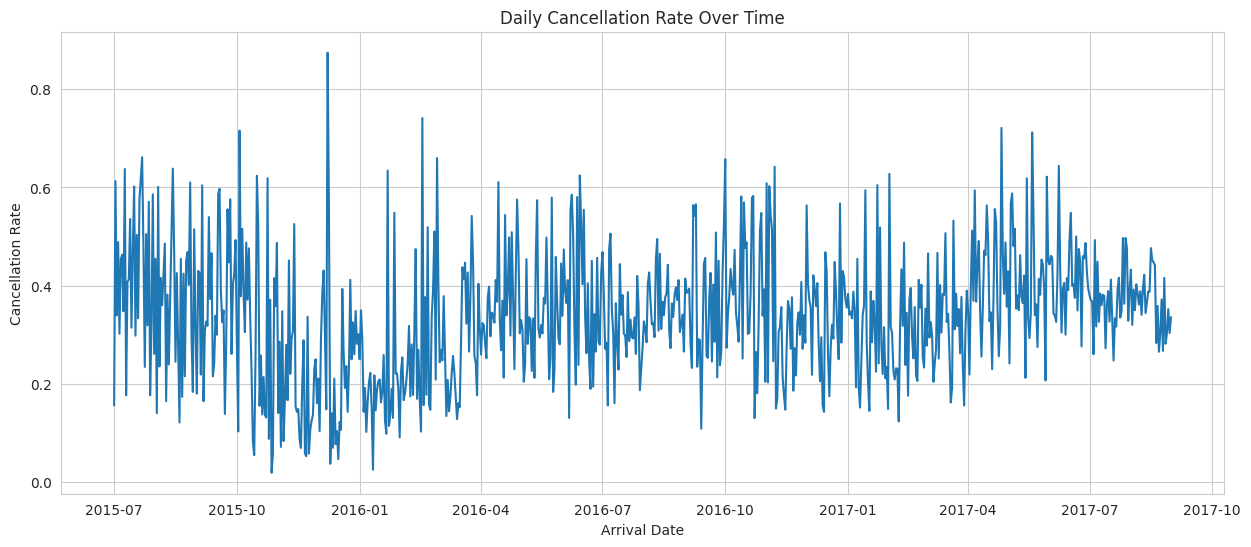

/tmp/ipython-input-2411791400.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cancellation_rate_monthly = df.set_index('arrival_date').resample('M')['is_canceled'].mean().reset_index()


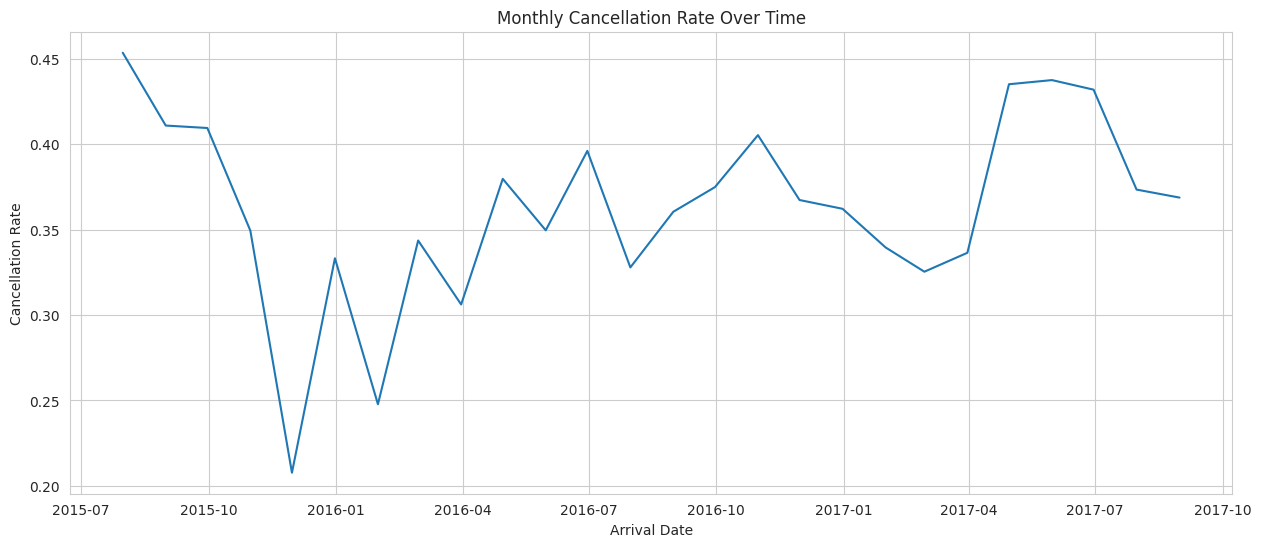

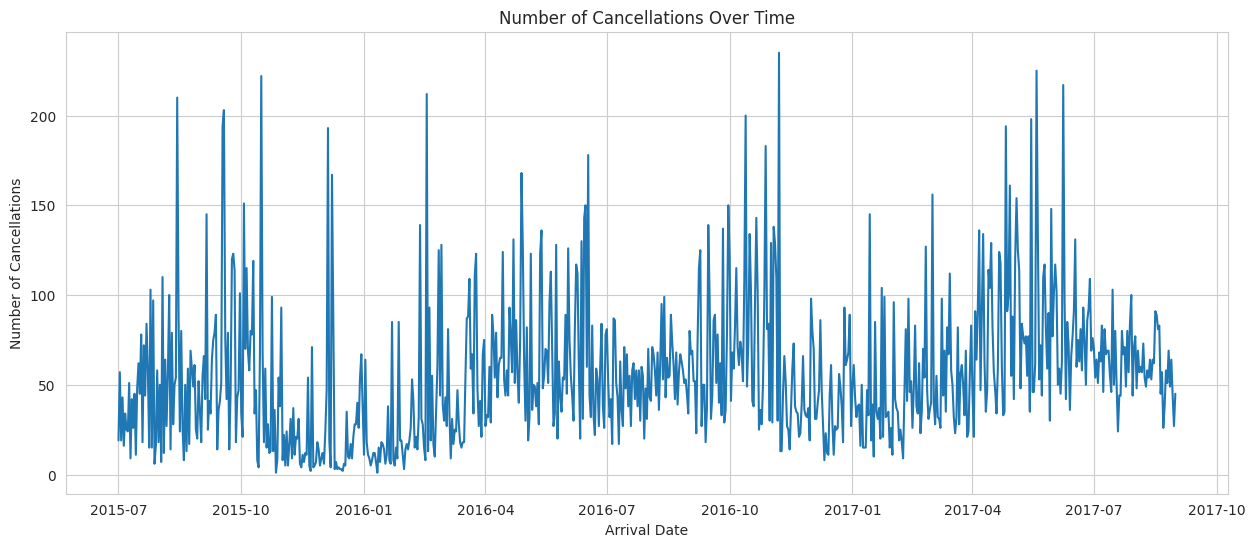

/tmp/ipython-input-2411791400.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cancellations_monthly = df[df['is_canceled'] == 1].set_index('arrival_date').resample('M').size().reset_index(name='cancellation_count')


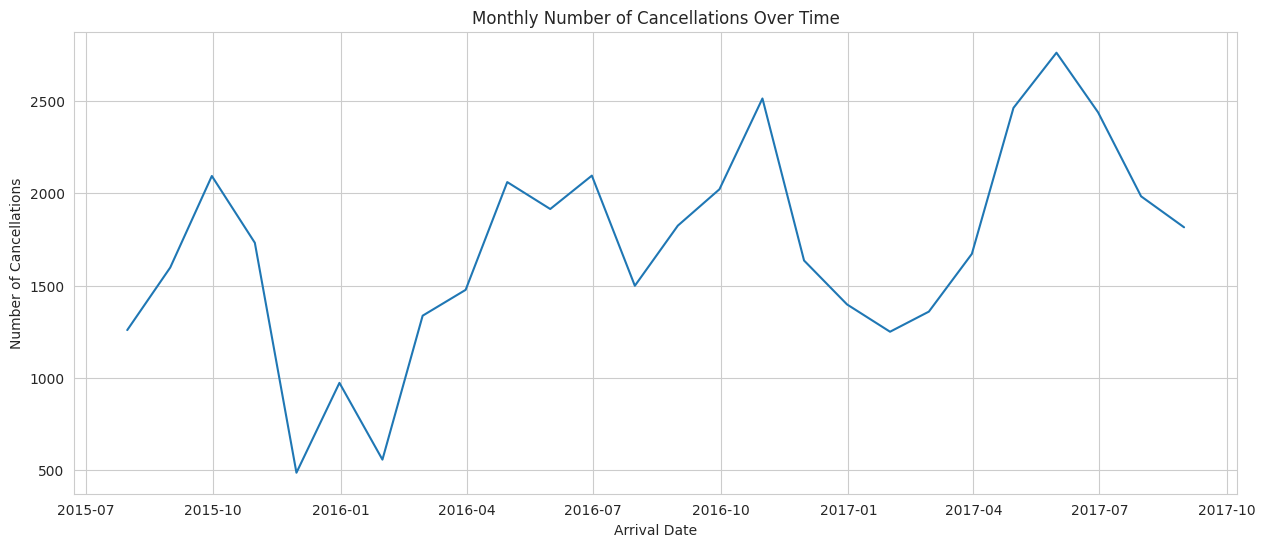

In [12]:
# Re-using the 'cancellation_rate_over_time' DataFrame created during EDA
# This DataFrame contains the daily cancellation rate.

plt.figure(figsize=(15, 6))
sns.lineplot(x='arrival_date', y='is_canceled', data=cancellation_rate_over_time)
plt.title('Daily Cancellation Rate Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Cancellation Rate')
plt.show()

# To explore seasonality, we can resample the data to a lower frequency, e.g., monthly
cancellation_rate_monthly = df.set_index('arrival_date').resample('M')['is_canceled'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='arrival_date', y='is_canceled', data=cancellation_rate_monthly)
plt.title('Monthly Cancellation Rate Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Cancellation Rate')
plt.show()

# We can also look at the number of cancellations over time
cancellations_over_time = df[df['is_canceled'] == 1].groupby('arrival_date').size().reset_index(name='cancellation_count')

plt.figure(figsize=(15, 6))
sns.lineplot(x='arrival_date', y='cancellation_count', data=cancellations_over_time)
plt.title('Number of Cancellations Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Number of Cancellations')
plt.show()

# Monthly cancellation counts
cancellations_monthly = df[df['is_canceled'] == 1].set_index('arrival_date').resample('M').size().reset_index(name='cancellation_count')

plt.figure(figsize=(15, 6))
sns.lineplot(x='arrival_date', y='cancellation_count', data=cancellations_monthly)
plt.title('Monthly Number of Cancellations Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Number of Cancellations')
plt.show()

# Note: While we can visualize trends, building a formal time series forecasting model,
# might require more advanced techniques and is beyond the scope of a typical classification project.
# The visualizations here help understand temporal patterns.

## Conclusion and Future Work




This project aimed to build a hotel booking cancellation prediction system. We started by loading and exploring the dataset, handling missing values and outliers, and performing extensive exploratory data analysis with visualizations to understand the factors influencing cancellations. We engineered new features to capture more relevant information for the models.

We then trained and evaluated six different machine learning models: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, K-Nearest Neighbors, and a Tuned Random Forest. Based on the evaluation metrics, particularly the F1-score, the **Random Forest Classifier** emerged as the best-performing model, achieving an F1-score of 0.7785 on the test set before tuning and 0.7464 after tuning. While the F1 score decreased slightly after tuning, the precision increased. The confusion matrix for the Random Forest model showed a good balance between correctly predicting cancellations and non-cancellations.

The EDA revealed several key factors associated with cancellations, including:
*   **Hotel Type**: City Hotels have a higher number of cancellations compared to Resort Hotels.
*   **Lead Time**: Longer lead times are generally associated with higher cancellation rates.
*   **Market Segment**: Certain market segments, like Online TA and Groups, show different cancellation patterns.
*   **Customer Type**: Transient customers have the highest number of cancellations.
*   **Special Requests**: Bookings with more special requests tend to have a lower cancellation rate.
*   **ADR**: The distribution of Average Daily Rate (ADR) is slightly different between canceled and non-canceled bookings.
*   **Temporal Trends**: There are noticeable seasonal patterns in cancellation rates and counts throughout the year.

The tuned Random Forest model provides a solid foundation for predicting hotel booking cancellations. The feature engineering process helped capture additional information that contributed to the model's performance.

**Future Work**:

*   **Further Hyperparameter Tuning**: Explore a wider range of hyperparameters and use more extensive search strategies (e.g., GridSearchCV with a smaller parameter grid or more iterations for RandomizedSearchCV) for the best-performing models to potentially improve performance further.
*   **More Advanced Feature Engineering**: Investigate creating more complex interaction terms or features derived from temporal aspects of the data (e.g., time since last booking, length of stay).
*   **Handling Class Imbalance**: While the dataset is not severely imbalanced, explore techniques like SMOTE or adjusting class weights to see if it further improves the minority class prediction (cancellations).
*   **Different Models**: Experiment with other advanced machine learning models such as XGBoost, LightGBM, or neural networks.
*   **Interpretability**: Explore techniques to understand feature importance from the best model to gain deeper insights into why bookings are canceled.
*   **Deployment**: Develop a system to integrate the trained model into a real-time hotel management platform for predicting cancellations at the time of booking.
*   **Forecasting Model**: If accurate prediction of future cancellation *volume* is required, develop a dedicated time series forecasting model using techniques like ARIMA or Prophet, leveraging the temporal patterns identified in the EDA.

## Model Deployment with Streamlit


Create a basic Streamlit application to deploy the best-performing model and make predictions.


Generate a Python script that utilizes the trained tuned Random Forest model  to create a simple web application using Streamlit. The app will take user input for the relevant features and output the predicted cancellation status.

In [13]:
# Save the best performing model
import joblib

best_model = best_rf_model # Assuming rand_forest_smote was the best model based on the previous analysis

joblib.dump(best_model, 'best_hotel_cancellation_model.pkl')

print("Best model saved as 'best_hotel_cancellation_model.pkl'")

Best model saved as 'best_hotel_cancellation_model.pkl'


In [14]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('best_hotel_cancellation_model.pkl')

st.title('Hotel Booking Cancellation Prediction')

st.write("""
Enter the details of the hotel booking to predict if it will be canceled.
""")

# Create input fields for the features used in the model
# You will need to adjust these based on the exact features in your X_train_smote
# Refer to X_train_smote.columns to get the list of expected features

# Example input fields (replace with your actual features)
lead_time = st.slider('Lead Time (days)', 0, 700, 100)
previous_cancellations = st.number_input('Previous Cancellations', 0, 26, 0)
previous_bookings_not_canceled = st.number_input('Previous Bookings Not Canceled', 0, 72, 0)
booking_changes = st.number_input('Booking Changes', 0, 21, 0)
days_in_waiting_list = st.number_input('Days in Waiting List', 0, 400, 0)
adr = st.slider('Average Daily Rate (ADR)', -10.0, 300.0, 100.0) # Adjust range based on your data
required_car_parking_spaces = st.number_input('Required Car Parking Spaces', 0, 3, 0) # Max is 8, but usually 0 or 1
total_of_special_requests = st.number_input('Total of Special Requests', 0, 5, 0)
total_guests = st.number_input('Total Guests', 0, 20, 2) # Adjust max based on your data
arrival_month = st.slider('Arrival Month (1=Jan, 12=Dec)', 1, 12, 7)
arrival_day_of_week = st.slider('Arrival Day of Week (0=Mon, 6=Sun)', 0, 6, 2)
total_nights_stay = st.number_input('Total Nights Stay', 0, 60, 3) # Adjust max based on your data
is_weekend_booking = st.selectbox('Is Weekend Booking', [0, 1], format_func=lambda x: 'Yes' if x == 1 else 'No')
lead_time_x_hotel_type = st.number_input('Lead Time x City Hotel (0 if Resort, Lead Time if City)', 0, 700, 0) # Need to handle this based on hotel type input
is_popular_month = st.selectbox('Is Popular Month (Top 3 booking months)', [0, 1], format_func=lambda x: 'Yes' if x == 1 else 'No')

# Assuming you have one-hot encoded features for deposit_type
deposit_type_No_Deposit = st.selectbox('Deposit Type: No Deposit', [False, True])
deposit_type_Non_Refund = st.selectbox('Deposit Type: Non Refund', [False, True])
deposit_type_Refundable = st.selectbox('Deposit Type: Refundable', [False, True])


# Create a dictionary with the input values
input_data = {
    'lead_time': lead_time,
    'previous_cancellations': previous_cancellations,
    'previous_bookings_not_canceled': previous_bookings_not_canceled,
    'booking_changes': booking_changes,
    'days_in_waiting_list': days_in_waiting_list,
    'adr': adr,
    'required_car_parking_spaces': required_car_parking_spaces,
    'total_of_special_requests': total_of_special_requests,
    'total_guests': total_guests,
    'arrival_month': arrival_month,
    'arrival_day_of_week': arrival_day_of_week,
    'total_nights_stay': total_nights_stay,
    'is_weekend_booking': is_weekend_booking,
    'lead_time_x_hotel_type': lead_time_x_hotel_type,
    'is_popular_month': is_popular_month,
    'deposit_type_No Deposit': deposit_type_No_Deposit,
    'deposit_type_Non Refund': deposit_type_Non_Refund,
    'deposit_type_Refundable': deposit_type_Refundable,

}

# Convert input data to a DataFrame
input_df = pd.DataFrame([input_data])

# Ensure the order of columns in the input DataFrame matches the training data
# This is crucial for correct prediction
# You might need to load a sample of your training data columns to get the exact order
# For now, let's assume the order is as defined above, but this is a potential point of failure
# A more robust approach would be to save the column order during training and load it here.

# Make prediction
if st.button('Predict Cancellation'):
    prediction = model.predict(input_df)

    if prediction[0] == 1:
        st.error('This booking is likely to be **Canceled**')
    else:
        st.success('This booking is likely **Not Canceled**')

Writing app.py


Now, create a new Python file (e.g., `app.py`) with the following content. You can run this file locally using `streamlit run app.py`.